In [23]:
# import gym
# import gym_oscillator
# import oscillator_cpp
# from stable_baselines.common import set_global_seeds

# from stable_baselines.common.policies import MlpPolicy,MlpLnLstmPolicy,FeedForwardPolicy
# from stable_baselines.common.vec_env import DummyVecEnv,SubprocVecEnv,VecNormalize, VecEnv
# from stable_baselines import PPO2
# from stable_baselines.common.vec_env import VecEnv

# import numpy as np
# from matplotlib import pyplot as plt


import gym
import gym_oscillator
import oscillator_cpp
from stable_baselines3.common.utils import set_random_seed

from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecNormalize
from stable_baselines3 import PPO

import numpy as np
from matplotlib import pyplot as plt



In [24]:
def make_env(env_id, rank, seed=0,):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :param s_i: (bool) reward form, only one can be true
    """
    def _init():
        # Import gym_oscillator in each subprocess to ensure registration
        import gym
        import gym_oscillator
        
        env = gym.make(env_id)
        print(f"Environment {env_id} created successfully in subprocess {rank}")
        print(env.reset().shape)
        return env
    set_random_seed(seed)
    return _init

### To train with stablebaselines

In [25]:
# Check if the environment is registered
try:
    gym.envs.registry['oscillator-v0']
    print("oscillator-v0 environment is registered")
except KeyError:
    print("oscillator-v0 environment is NOT registered")
    # Try to register it manually if needed

# Test with single environment first
env_id = 'oscillator-v0'
print(f"Creating single environment: {env_id}")

# Test single environment creation
test_env = gym.make(env_id)
print(f"Single environment created successfully!")
print(f"Observation space: {test_env.observation_space}")
print(f"Action space: {test_env.action_space}")
test_reset = test_env.reset()
print(f"Reset output shape: {test_reset.shape if hasattr(test_reset, 'shape') else type(test_reset)}")
test_env.close()

# Now try with DummyVecEnv (single process) first
print("\nTesting with DummyVecEnv (single process)...")
env = DummyVecEnv([lambda: gym.make(env_id)])
print("DummyVecEnv created successfully!")

# Create model with single environment
time_steps = int(10e6)
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="MLP/")
print("Model created successfully!")

# If single process works, we can try multiprocessing later
# Commented out multiprocessing for now:
# num_cpu = 8
# env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

oscillator-v0 environment is registered
Creating single environment: oscillator-v0
Single environment created successfully!
Observation space: Box(-1.5, 1.5, (250,), float32)
Action space: Box(-1.0, 1.0, (1,), float32)
Reset output shape: (250,)

Testing with DummyVecEnv (single process)...
DummyVecEnv created successfully!
Using cuda device
Model created successfully!


### Save

In [4]:
# model.save('trained_models/model5layers.tf')

### Load model

In [5]:
env_id = 'oscillator-v0'
env = gym.make(env_id)
#Number of cpus
num_cpu = 1

env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])
model = PPO2(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
model = model.load('trained_models/Ps6_final_3')

Environment oscillator-v0 created successfully in subprocess 0
(250,)


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

Environment oscillator-v0 created successfully in subprocess 0
(250,)


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

NameError: name 'PPO2' is not defined

In [26]:
env = gym.make(env_id)
#Store rewards
rews_ = []
#Store observations
obs_ = []
obs = env.reset()
#Store actions
acs_ = []
#Store X,Y according to 
states_x = []
states_y = []

#Initial, non-suppresssion 
for i in range(25000):
    obs, rewards, dones, info = env.step([0])
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(0)
    rews_.append(rewards)

#Suppression stage
for i in range(25000):
    action, _states = model.predict(obs)
   
    obs, rewards, dones, info = env.step(action)
   
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(action)
    rews_.append(rewards)

#Final relaxation
for i in range(5000):
    obs, rewards, dones, info = env.step([0])
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(0)
    rews_.append(rewards)


### Graph plot

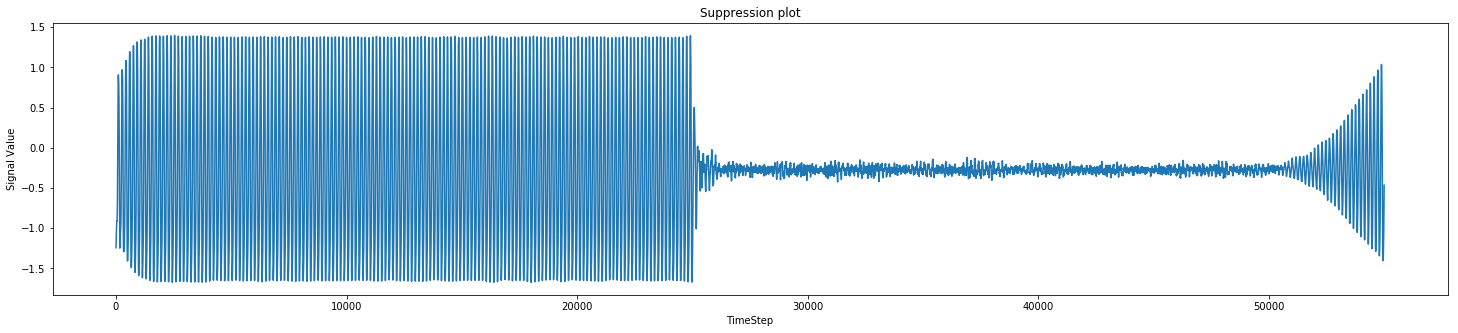

In [9]:
plt.figure(figsize=(25,5))
plt.title('Suppression plot')
plt.xlabel('TimeStep')
plt.ylabel('Signal Value')
plt.plot(states_x)

### Model score:

In [12]:
print(np.std(states_x[5000:25000])/np.std(states_x[30000:45000]))
s = (np.std(states_x[5000:25000])/np.std(states_x[30000:45000]))
print(np.sqrt(s))

27.266212742105157
5.22170592259897


In [11]:
print(np.mean(states_x[5000:150000]))

-0.2683076704695317


In [31]:
np.sqrt(1.10554209724429/0.0367348421348131)

5.48590841941973

## Env Analysis

Environment Analysis:
Observation space: Box(-1.5, 1.5, (250,), float32)
Action space: Box(-1.0, 1.0, (1,), float32)
Initial observation shape: (250,)

Data collection complete!
Observations shape: (1000, 250)
Actions shape: (1000, 1)


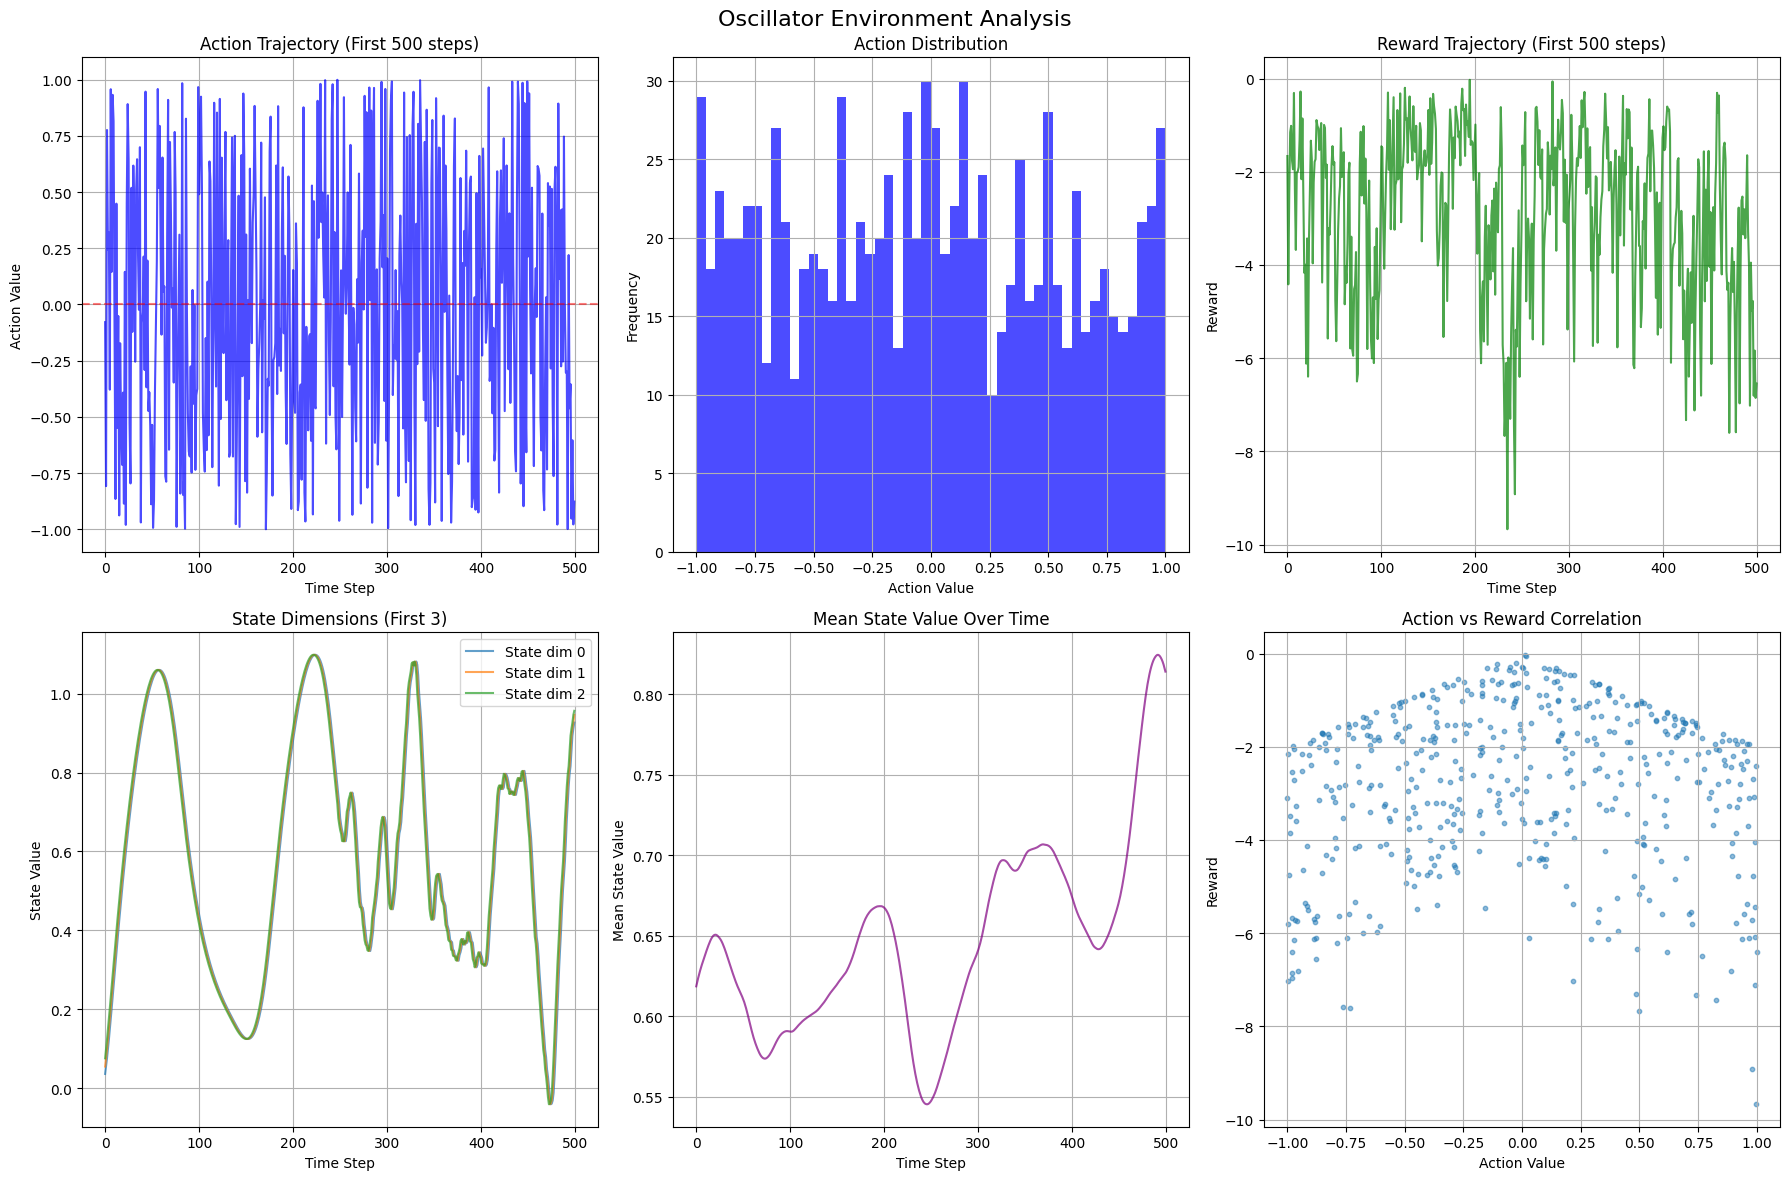


ENVIRONMENT STATISTICS
Action Statistics:
  Mean: -0.0215
  Std:  0.5749
  Min:  -1.0000
  Max:  0.9997

Reward Statistics:
  Mean: -2.8869
  Std:  1.8016
  Min:  -9.6712
  Max:  -0.0274

State Statistics:
  State shape: (1000, 250)
  State mean: 0.6170
  State std:  0.4234
  State range: [-0.3629, 1.5773]

State Dimension Analysis:
  Dim  0: mean= 0.5769, std= 0.4091, range=[-0.3629,  1.5773]
  Dim  1: mean= 0.5782, std= 0.4094, range=[-0.3629,  1.5773]
  Dim  2: mean= 0.5795, std= 0.4097, range=[-0.3629,  1.5773]
  Dim  3: mean= 0.5807, std= 0.4101, range=[-0.3629,  1.5773]
  Dim  4: mean= 0.5820, std= 0.4106, range=[-0.3629,  1.5773]
  Dim  5: mean= 0.5833, std= 0.4111, range=[-0.3629,  1.5773]
  Dim  6: mean= 0.5845, std= 0.4117, range=[-0.3629,  1.5773]
  Dim  7: mean= 0.5857, std= 0.4122, range=[-0.3629,  1.5773]
  Dim  8: mean= 0.5868, std= 0.4127, range=[-0.3629,  1.5773]
  Dim  9: mean= 0.5879, std= 0.4132, range=[-0.3629,  1.5773]

Environment Behavior Analysis:
  Episodes c

In [27]:
# Fix NumPy compatibility issue
import numpy as np
import warnings

# Patch numpy.bool8 if it doesn't exist (compatibility fix)
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# Environment Analysis: Plot Actions and States (Fixed Version)
import matplotlib.pyplot as plt
import gym
import gym_oscillator

# Create a single environment for analysis
env = gym.make('oscillator-v0')

# Handle both old and new gym API
try:
    obs = env.reset()
    if isinstance(obs, tuple):
        obs = obs[0]  # New gym API returns (obs, info)
except:
    obs = env.reset()

# Collect data from environment
num_steps = 1000
observations = []
actions = []
rewards = []
dones = []

print(f"Environment Analysis:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
print(f"Initial observation shape: {obs.shape}")

# Run random actions to collect data
print(f"\nCollecting {num_steps} steps of data...")
for step in range(num_steps):
    # Sample random action
    action = env.action_space.sample()
    
    # Take step - handle both old and new gym API
    try:
        step_result = env.step(action)
        if len(step_result) == 4:
            obs, reward, done, info = step_result
        else:  # New gym API returns 5 values
            obs, reward, terminated, truncated, info = step_result
            done = terminated or truncated
    except Exception as e:
        print(f"Step error: {e}")
        break
    
    # Store data
    observations.append(obs.copy())
    actions.append(action.copy())
    rewards.append(reward)
    dones.append(done)
    
    # Reset if done
    if done:
        reset_result = env.reset()
        if isinstance(reset_result, tuple):
            obs = reset_result[0]  # New gym API
        else:
            obs = reset_result  # Old gym API

# Convert to numpy arrays
observations = np.array(observations)
actions = np.array(actions)
rewards = np.array(rewards)

print(f"Data collection complete!")
print(f"Observations shape: {observations.shape}")
print(f"Actions shape: {actions.shape}")

# Create comprehensive plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Oscillator Environment Analysis', fontsize=16)

# Plot 1: Action trajectory
plot_steps = min(500, len(actions))
axes[0, 0].plot(actions[:plot_steps], 'b-', alpha=0.7)
axes[0, 0].set_title(f'Action Trajectory (First {plot_steps} steps)')
axes[0, 0].set_xlabel('Time Step')
axes[0, 0].set_ylabel('Action Value')
axes[0, 0].grid(True)
axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Plot 2: Action distribution
axes[0, 1].hist(actions.flatten(), bins=50, alpha=0.7, color='blue')
axes[0, 1].set_title('Action Distribution')
axes[0, 1].set_xlabel('Action Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Plot 3: Reward trajectory
axes[0, 2].plot(rewards[:plot_steps], 'g-', alpha=0.7)
axes[0, 2].set_title(f'Reward Trajectory (First {plot_steps} steps)')
axes[0, 2].set_xlabel('Time Step')
axes[0, 2].set_ylabel('Reward')
axes[0, 2].grid(True)

# Plot 4: State space analysis (first few dimensions)
axes[1, 0].plot(observations[:plot_steps, 0], label='State dim 0', alpha=0.7)
if observations.shape[1] > 1:
    axes[1, 0].plot(observations[:plot_steps, 1], label='State dim 1', alpha=0.7)
if observations.shape[1] > 2:
    axes[1, 0].plot(observations[:plot_steps, 2], label='State dim 2', alpha=0.7)
axes[1, 0].set_title('State Dimensions (First 3)')
axes[1, 0].set_xlabel('Time Step')
axes[1, 0].set_ylabel('State Value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 5: State mean across time
state_means = np.mean(observations, axis=1)
axes[1, 1].plot(state_means[:plot_steps], 'purple', alpha=0.7)
axes[1, 1].set_title('Mean State Value Over Time')
axes[1, 1].set_xlabel('Time Step')
axes[1, 1].set_ylabel('Mean State Value')
axes[1, 1].grid(True)

# Plot 6: Action vs Reward correlation
axes[1, 2].scatter(actions[:plot_steps], rewards[:plot_steps], alpha=0.5, s=10)
axes[1, 2].set_title('Action vs Reward Correlation')
axes[1, 2].set_xlabel('Action Value')
axes[1, 2].set_ylabel('Reward')
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

# Print statistical analysis
print("\n" + "="*50)
print("ENVIRONMENT STATISTICS")
print("="*50)
print(f"Action Statistics:")
print(f"  Mean: {np.mean(actions):.4f}")
print(f"  Std:  {np.std(actions):.4f}")
print(f"  Min:  {np.min(actions):.4f}")
print(f"  Max:  {np.max(actions):.4f}")

print(f"\nReward Statistics:")
print(f"  Mean: {np.mean(rewards):.4f}")
print(f"  Std:  {np.std(rewards):.4f}")
print(f"  Min:  {np.min(rewards):.4f}")
print(f"  Max:  {np.max(rewards):.4f}")

print(f"\nState Statistics:")
print(f"  State shape: {observations.shape}")
print(f"  State mean: {np.mean(observations):.4f}")
print(f"  State std:  {np.std(observations):.4f}")
print(f"  State range: [{np.min(observations):.4f}, {np.max(observations):.4f}]")

# Analyze state dimensions
print(f"\nState Dimension Analysis:")
for i in range(min(10, observations.shape[1])):  # First 10 dimensions
    dim_data = observations[:, i]
    print(f"  Dim {i:2d}: mean={np.mean(dim_data):7.4f}, std={np.std(dim_data):7.4f}, range=[{np.min(dim_data):7.4f}, {np.max(dim_data):7.4f}]")

# Check for any patterns or interesting behaviors
print(f"\nEnvironment Behavior Analysis:")
print(f"  Episodes completed: {np.sum(dones)}")
print(f"  Average episode length: {len(dones) / max(1, np.sum(dones)):.1f}")
if len(actions) > 0 and len(rewards) > 0:
    print(f"  Action-reward correlation: {np.corrcoef(actions.flatten(), rewards)[0,1]:.4f}")

env.close()

## Multi ENV RL-DBS

In [28]:
# Corrected Multi-environment setup with SubprocVecEnv
import gym
import gym_oscillator
import numpy as np
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3 import PPO

def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param rank: (int) index of the subprocess
    :param seed: (int) the initial seed for RNG
    """
    def _init():
        # Import gym_oscillator in each subprocess to ensure registration
        import gym
        import gym_oscillator
        import numpy as np
        
        # Set numpy random seed for this process
        np.random.seed(seed + rank)
        
        env = gym.make(env_id)
        
        # Try to seed the environment if it supports it
        try:
            if hasattr(env, 'seed'):
                env.seed(seed + rank)
            elif hasattr(env.unwrapped, 'seed'):
                env.unwrapped.seed(seed + rank)
        except AttributeError:
            # If no seed method, just set numpy seed (already done above)
            pass
        
        return env
    
    set_random_seed(seed + rank)
    return _init

# Environment configuration
env_id = 'oscillator-v0'
num_cpu = 4  # Reduced from 8 to start smaller
seed = 42

# Create multi-environment
print(f"Creating {num_cpu} parallel environments...")
try:
    env = SubprocVecEnv([make_env(env_id, i, seed) for i in range(num_cpu)])
    print("Multi-environment created successfully!")
    
    # Create PPO model for multi-environment training
    model = PPO(
        "MlpPolicy", 
        env, 
        verbose=1,
        tensorboard_log="MLP/",
        device="cpu"  # Use CPU to avoid GPU warnings with multiprocessing
    )
    
    print("PPO model created with multi-environment setup!")
    print(f"Total environments: {env.num_envs}")
    
except Exception as e:
    print(f"Multi-environment failed: {e}")
    print("Falling back to single environment...")
    
    # Fallback to single environment
    env = DummyVecEnv([lambda: gym.make(env_id)])
    model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="MLP/")
    print("Single environment setup completed!")

Creating 4 parallel environments...


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioni

Multi-environment created successfully!
Using cpu device
PPO model created with multi-environment setup!
Total environments: 4


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


## Neural ODE System ID 

Starting robust system identification...
Successfully collected 2000 samples
Training on 2000 samples...
State dim: 250, Action dim: 1
Training model...
Epoch 0: Loss = 1.016188
Epoch 50: Loss = 0.075901
Epoch 100: Loss = 0.030552
Epoch 150: Loss = 0.017300


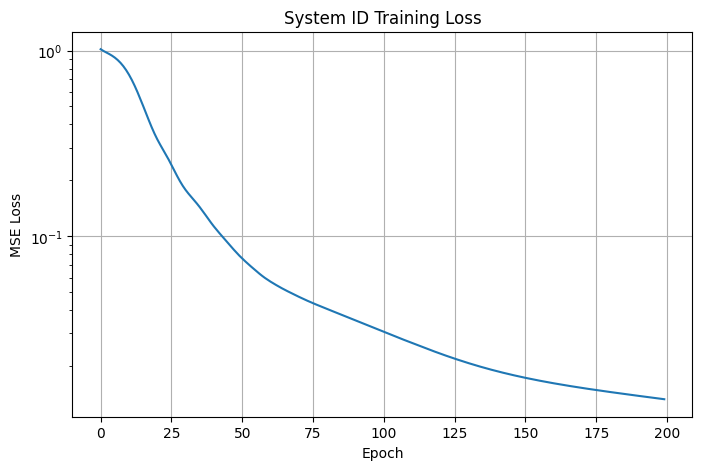

Testing model with 30 predictions...


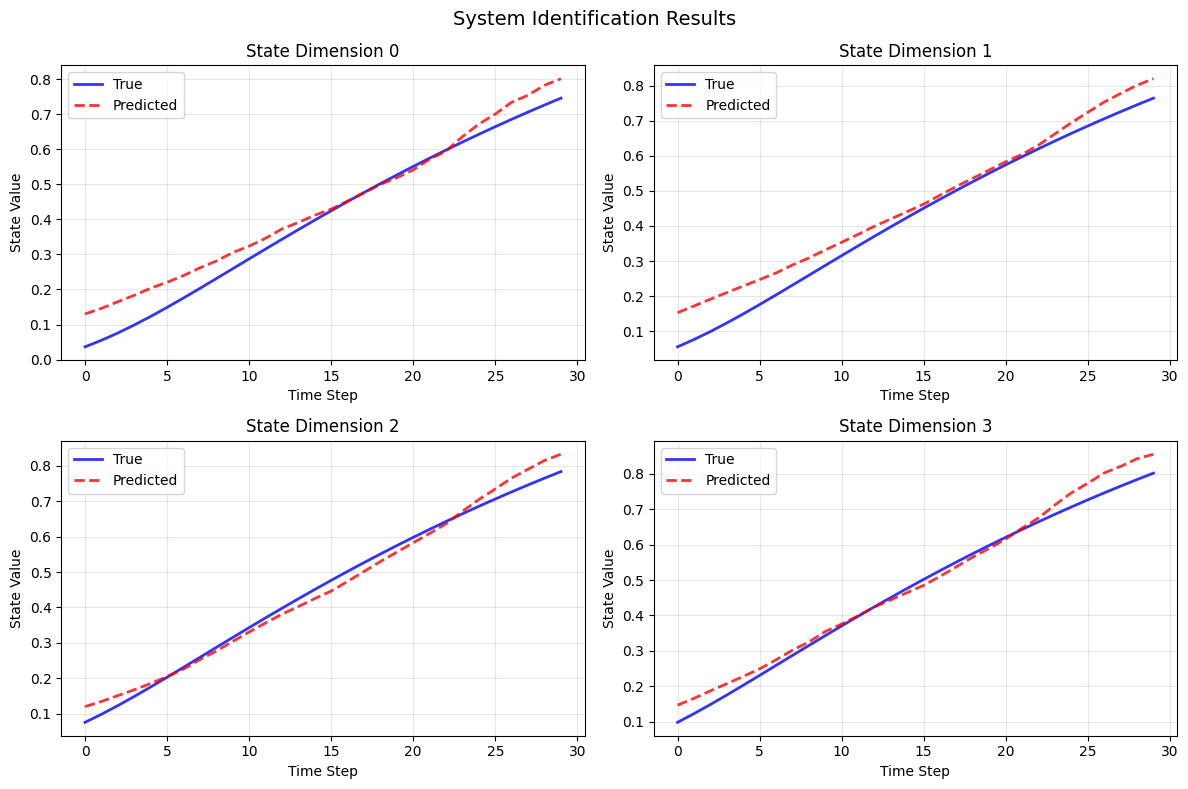


System Identification Results:
  Samples tested: 30
  MSE Error: 0.000657
  MAE Error: 0.020341
  Relative Error: 0.0321

✅ System identification completed successfully!
Variables available: neural_ode_model, state_scaler, action_scaler, dt


In [29]:
# Fixed System Identification with NumPy Compatibility
import numpy as np
import warnings

# Fix NumPy compatibility issues
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_
if not hasattr(np, 'int0'):
    np.int0 = np.int_
if not hasattr(np, 'uint0'):
    np.uint0 = np.uint
if not hasattr(np, 'complex256'):
    np.complex256 = np.complex128

# Suppress warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gym
import gym_oscillator

# Patch gym environment to avoid numpy issues
def patch_gym_env():
    """Patch to handle gym compatibility issues"""
    import gym.spaces
    original_sample = gym.spaces.Box.sample
    
    def patched_sample(self, mask=None):
        try:
            return original_sample(self, mask)
        except AttributeError:
            # Fallback sampling
            return self.low + (self.high - self.low) * np.random.random(self.shape)
    
    gym.spaces.Box.sample = patched_sample

# Apply the patch
patch_gym_env()

class SimpleSystemID(nn.Module):
    """Simple neural network for system identification"""
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super(SimpleSystemID, self).__init__()
        
        self.net = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, state_dim)
        )
        
    def forward(self, state, action):
        x = torch.cat([state, action], dim=1)
        return self.net(x)

def collect_data_safely():
    """Safely collect data from the environment"""
    print("Collecting training data...")
    
    # Create environment
    env = gym.make('oscillator-v0')
    
    # Initialize lists
    states = []
    actions = []
    next_states = []
    
    # Reset environment
    try:
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]
    except Exception as e:
        print(f"Reset error: {e}")
        env.close()
        return None, None, None
    
    # Collect data with error handling
    successful_steps = 0
    
    for i in range(2000):  # Increased data collection
        try:
            # Manual action sampling to avoid numpy issues
            action_shape = env.action_space.shape
            action_low = env.action_space.low
            action_high = env.action_space.high
            action = action_low + (action_high - action_low) * np.random.random(action_shape)
            
            # Take step
            step_result = env.step(action)
            
            if len(step_result) == 4:
                next_state, reward, done, info = step_result
            else:
                next_state, reward, terminated, truncated, info = step_result
                done = terminated or truncated
            
            # Store data
            states.append(state.copy())
            actions.append(action.copy())
            next_states.append(next_state.copy())
            
            successful_steps += 1
            state = next_state
            
            # Reset if done
            if done:
                try:
                    reset_result = env.reset()
                    state = reset_result[0] if isinstance(reset_result, tuple) else reset_result
                except:
                    break
                    
        except Exception as e:
            if i < 10:  # Only print first few errors
                print(f"Step {i} error: {e}")
            continue
    
    env.close()
    
    if successful_steps < 100:
        print(f"Only collected {successful_steps} samples, this may not be enough")
        return None, None, None
    
    print(f"Successfully collected {successful_steps} samples")
    
    # Convert to arrays
    states = np.array(states)
    actions = np.array(actions)
    next_states = np.array(next_states)
    
    return states, actions, next_states

def train_system_id(states, actions, next_states):
    """Train the system identification model"""
    print(f"Training on {len(states)} samples...")
    print(f"State dim: {states.shape[1]}, Action dim: {actions.shape[1]}")
    
    # Normalize data
    state_scaler = StandardScaler()
    action_scaler = StandardScaler()
    
    states_norm = state_scaler.fit_transform(states)
    actions_norm = action_scaler.fit_transform(actions)
    next_states_norm = state_scaler.transform(next_states)
    
    # Convert to tensors
    states_tensor = torch.FloatTensor(states_norm)
    actions_tensor = torch.FloatTensor(actions_norm)
    next_states_tensor = torch.FloatTensor(next_states_norm)
    
    # Create model
    state_dim = states.shape[1]
    action_dim = actions.shape[1]
    model = SimpleSystemID(state_dim, action_dim)
    
    # Training setup
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    
    print("Training model...")
    losses = []
    
    # Training loop
    for epoch in range(200):  # Increased epochs
        optimizer.zero_grad()
        
        # Forward pass
        pred_next_states = model(states_tensor, actions_tensor)
        
        # Compute loss
        loss = criterion(pred_next_states, next_states_tensor)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.6f}")
    
    # Plot training loss
    plt.figure(figsize=(8, 5))
    plt.plot(losses)
    plt.title('System ID Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.yscale('log')
    plt.grid(True)
    plt.show()
    
    return model, state_scaler, action_scaler

def test_predictions(model, state_scaler, action_scaler, test_steps=30):
    """Test the model predictions"""
    print(f"Testing model with {test_steps} predictions...")
    
    # Create environment for testing
    env = gym.make('oscillator-v0')
    
    try:
        # Reset environment
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]
    except Exception as e:
        print(f"Test environment reset failed: {e}")
        env.close()
        return
    
    true_states = []
    predicted_states = []
    test_actions = []
    
    current_state = state
    
    for i in range(test_steps):
        try:
            # Generate action manually
            action_shape = env.action_space.shape
            action_low = env.action_space.low
            action_high = env.action_space.high
            action = action_low + (action_high - action_low) * np.random.random(action_shape)
            
            # Get true next state from environment
            step_result = env.step(action)
            if len(step_result) == 4:
                true_next_state, _, done, _ = step_result
            else:
                true_next_state, _, terminated, truncated, _ = step_result
                done = terminated or truncated
            
            # Predict next state with model
            with torch.no_grad():
                state_norm = state_scaler.transform(current_state.reshape(1, -1))
                action_norm = action_scaler.transform(action.reshape(1, -1))
                
                state_tensor = torch.FloatTensor(state_norm)
                action_tensor = torch.FloatTensor(action_norm)
                
                pred_next_norm = model(state_tensor, action_tensor)
                pred_next_state = state_scaler.inverse_transform(pred_next_norm.numpy())[0]
            
            # Store results
            true_states.append(true_next_state)
            predicted_states.append(pred_next_state)
            test_actions.append(action)
            
            current_state = true_next_state
            
            if done:
                reset_result = env.reset()
                current_state = reset_result[0] if isinstance(reset_result, tuple) else reset_result
                
        except Exception as e:
            print(f"Test step {i} failed: {e}")
            break
    
    env.close()
    
    if len(true_states) == 0:
        print("No test data collected")
        return
    
    # Convert to arrays
    true_states = np.array(true_states)
    predicted_states = np.array(predicted_states)
    
    # Plot results for first few dimensions
    num_dims_to_plot = min(4, true_states.shape[1])
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i in range(num_dims_to_plot):
        axes[i].plot(true_states[:, i], 'b-', label='True', linewidth=2, alpha=0.8)
        axes[i].plot(predicted_states[:, i], 'r--', label='Predicted', linewidth=2, alpha=0.8)
        axes[i].set_title(f'State Dimension {i}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Time Step')
        axes[i].set_ylabel('State Value')
    
    plt.suptitle('System Identification Results', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Compute and display errors
    mse_error = np.mean((true_states - predicted_states)**2)
    mae_error = np.mean(np.abs(true_states - predicted_states))
    relative_error = mae_error / (np.mean(np.abs(true_states)) + 1e-8)
    
    print(f"\nSystem Identification Results:")
    print(f"  Samples tested: {len(true_states)}")
    print(f"  MSE Error: {mse_error:.6f}")
    print(f"  MAE Error: {mae_error:.6f}")
    print(f"  Relative Error: {relative_error:.4f}")
    
    return true_states, predicted_states

# Main execution
def run_system_identification():
    """Run the complete system identification pipeline"""
    print("Starting robust system identification...")
    
    # Step 1: Collect data
    states, actions, next_states = collect_data_safely()
    
    if states is None:
        print("Data collection failed. Cannot proceed.")
        return None, None, None
    
    # Step 2: Train model
    model, state_scaler, action_scaler = train_system_id(states, actions, next_states)
    
    # Step 3: Test model
    test_predictions(model, state_scaler, action_scaler)
    
    return model, state_scaler, action_scaler

# Run the system identification
neural_ode_model, state_scaler, action_scaler = run_system_identification()
dt = 0.01

if neural_ode_model is not None:
    print("\n✅ System identification completed successfully!")
    print("Variables available: neural_ode_model, state_scaler, action_scaler, dt")
else:
    print("❌ System identification failed")

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import time
import warnings

# Fix NumPy compatibility
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_
warnings.filterwarnings('ignore')

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class NeuralODEFunc(nn.Module):
    """Neural ODE function for learning continuous dynamics"""
    def __init__(self, state_dim, action_dim, hidden_dim=64):
        super(NeuralODEFunc, self).__init__()
        
        # Smaller network for stability
        self.net = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, state_dim)
        )
        
        self.state_dim = state_dim
        self.action_dim = action_dim
        
    def forward(self, t, x):
        # x contains [state, action]: [batch_size, state_dim + action_dim]
        state = x[:, :self.state_dim]
        action = x[:, self.state_dim:]
        
        # Compute state derivative: dx/dt = f(x, u)
        input_concat = torch.cat([state, action], dim=1)
        dxdt = self.net(input_concat)
        
        # Action derivative is zero (actions are constant during integration)
        dadt = torch.zeros_like(action)
        
        return torch.cat([dxdt, dadt], dim=1)

class NeuralODESystemID(nn.Module):
    """Neural ODE System Identification Model"""
    def __init__(self, state_dim, action_dim, hidden_dim=64):
        super(NeuralODESystemID, self).__init__()
        self.func = NeuralODEFunc(state_dim, action_dim, hidden_dim)
        self.state_dim = state_dim
        self.action_dim = action_dim
        
    def forward(self, x0, action, dt):
        """
        Predict next state using Neural ODE
        x0: initial state [batch_size, state_dim]
        action: action [batch_size, action_dim]
        dt: time step
        """
        # Combine state and action
        x_aug = torch.cat([x0, action], dim=1)
        
        # Time span for integration
        t = torch.tensor([0., dt], dtype=torch.float32).to(x_aug.device)
        
        # Solve ODE
        try:
            solution = odeint(self.func, x_aug, t, method='dopri5', rtol=1e-4, atol=1e-6)
            # Return final state (remove action part)
            final_state = solution[-1, :, :self.state_dim]
            return final_state
        except Exception as e:
            print(f"ODE solver error: {e}")
            # Fallback: return input state
            return x0

def collect_neural_ode_data(num_samples=3000):
    """Collect data for Neural ODE training"""
    print(f"Collecting {num_samples} samples for Neural ODE training...")
    
    env = gym.make('oscillator-v0')
    
    states = []
    actions = []
    next_states = []
    
    # Reset environment
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    
    successful_samples = 0
    
    for i in range(num_samples):
        try:
            # Generate action manually
            action_shape = env.action_space.shape
            action_low = env.action_space.low
            action_high = env.action_space.high
            action = action_low + (action_high - action_low) * np.random.random(action_shape)
            
            # Take step
            step_result = env.step(action)
            if len(step_result) == 4:
                next_state, reward, done, info = step_result
            else:
                next_state, reward, terminated, truncated, info = step_result
                done = terminated or truncated
            
            # Store data
            states.append(state.copy())
            actions.append(action.copy())
            next_states.append(next_state.copy())
            
            successful_samples += 1
            state = next_state
            
            if done:
                reset_result = env.reset()
                state = reset_result[0] if isinstance(reset_result, tuple) else reset_result
                
        except Exception as e:
            if i < 5:
                print(f"Sample {i} error: {e}")
            continue
    
    env.close()
    
    if successful_samples < 500:
        print(f"Warning: Only collected {successful_samples} samples")
        return None, None, None
    
    print(f"Successfully collected {successful_samples} samples")
    
    # Convert to arrays
    states = np.array(states)
    actions = np.array(actions) 
    next_states = np.array(next_states)
    
    return states, actions, next_states

def train_neural_ode_sysid():
    """Train the Neural ODE system identification model"""
    print("Starting Neural ODE System Identification Training...")
    
    # Collect training data
    states, actions, next_states = collect_neural_ode_data(num_samples=3000)
    
    if states is None:
        print("Data collection failed!")
        return None, None, None, None
    
    # Normalize data
    state_scaler = StandardScaler()
    action_scaler = StandardScaler()
    
    states_norm = state_scaler.fit_transform(states)
    actions_norm = action_scaler.fit_transform(actions)
    next_states_norm = state_scaler.transform(next_states)
    
    print(f"Data shapes - States: {states_norm.shape}, Actions: {actions_norm.shape}")
    
    # Convert to tensors
    states_tensor = torch.FloatTensor(states_norm).to(device)
    actions_tensor = torch.FloatTensor(actions_norm).to(device)
    next_states_tensor = torch.FloatTensor(next_states_norm).to(device)
    
    # Create dataset and dataloader
    dataset = TensorDataset(states_tensor, actions_tensor, next_states_tensor)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
    
    # Initialize Neural ODE model
    state_dim = states.shape[1]
    action_dim = actions.shape[1]
    model = NeuralODESystemID(state_dim, action_dim, hidden_dim=64).to(device)
    
    # Optimizer and loss
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.8)
    
    # Time step
    dt = 0.01
    
    print("Training Neural ODE...")
    start_time = time.time()
    
    # Training loop
    num_epochs = 100
    losses = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        num_batches = 0
        
        for batch_states, batch_actions, batch_next_states in dataloader:
            optimizer.zero_grad()
            
            # Predict next states using Neural ODE
            pred_next_states = model(batch_states, batch_actions, dt)
            
            # Compute loss
            loss = criterion(pred_next_states, batch_next_states)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping for stability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            epoch_loss += loss.item()
            num_batches += 1
        
        scheduler.step()
        avg_loss = epoch_loss / num_batches
        losses.append(avg_loss)
        
        if epoch % 10 == 0:
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch {epoch:3d}/{num_epochs}: Loss = {avg_loss:.6f}, LR = {current_lr:.2e}")
    
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds")
    
    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Neural ODE Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return model, state_scaler, action_scaler, dt



Using device: cuda


In [31]:
def test_neural_ode_model(model, state_scaler, action_scaler, dt, test_steps=50):
    """Test the trained Neural ODE model"""
    print(f"Testing Neural ODE model with {test_steps} predictions...")
    
    # Create test environment
    env = gym.make('oscillator-v0')
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    
    true_states = []
    predicted_states = []
    
    current_state = state
    
    model.eval()
    with torch.no_grad():
        for i in range(test_steps):
            try:
                # Generate action
                action_shape = env.action_space.shape
                action_low = env.action_space.low
                action_high = env.action_space.high
                action = action_low + (action_high - action_low) * np.random.random(action_shape)
                
                # Get true next state
                step_result = env.step(action)
                if len(step_result) == 4:
                    true_next_state, _, done, _ = step_result
                else:
                    true_next_state, _, terminated, truncated, _ = step_result
                    done = terminated or truncated
                
                # Predict using Neural ODE
                state_norm = state_scaler.transform(current_state.reshape(1, -1))
                action_norm = action_scaler.transform(action.reshape(1, -1))
                
                state_tensor = torch.FloatTensor(state_norm).to(device)
                action_tensor = torch.FloatTensor(action_norm).to(device)
                
                pred_next_norm = model(state_tensor, action_tensor, dt)
                pred_next_state = state_scaler.inverse_transform(pred_next_norm.cpu().numpy())[0]
                
                # Store results
                true_states.append(true_next_state)
                predicted_states.append(pred_next_state)
                
                current_state = true_next_state
                
                if done:
                    reset_result = env.reset()
                    current_state = reset_result[0] if isinstance(reset_result, tuple) else reset_result
                    
            except Exception as e:
                print(f"Test step {i} failed: {e}")
                break
    
    env.close()
    
    if len(true_states) == 0:
        print("No test data collected")
        return
    
    # Convert to arrays
    true_states = np.array(true_states)
    predicted_states = np.array(predicted_states)
    
    # Plot comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Neural ODE System Identification Results', fontsize=16)
    
    # Plot first 4 state dimensions
    for i in range(min(4, true_states.shape[1])):
        row, col = i // 2, i % 2
        
        axes[row, col].plot(true_states[:, i], 'b-', label='True Environment', linewidth=2, alpha=0.8)
        axes[row, col].plot(predicted_states[:, i], 'r--', label='Neural ODE Prediction', linewidth=2, alpha=0.8)
        axes[row, col].set_title(f'State Dimension {i}')
        axes[row, col].set_xlabel('Time Step')
        axes[row, col].set_ylabel('State Value')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Compute errors
    mse_error = np.mean((true_states - predicted_states)**2)
    mae_error = np.mean(np.abs(true_states - predicted_states))
    relative_error = mae_error / (np.mean(np.abs(true_states)) + 1e-8)
    
    print(f"\nNeural ODE System Identification Results:")
    print(f"  Test samples: {len(true_states)}")
    print(f"  MSE Error: {mse_error:.6f}")
    print(f"  MAE Error: {mae_error:.6f}")
    print(f"  Relative Error: {relative_error:.4f}")
    
    if relative_error < 0.1:
        print("✅ Excellent Neural ODE performance!")
    elif relative_error < 0.3:
        print("✅ Good Neural ODE performance!")
    else:
        print("⚠️  Neural ODE may need more training or tuning")



Starting Neural ODE System Identification Training...
Successfully collected 3000 samples
Data shapes - States: (3000, 250), Actions: (3000, 1)
Training Neural ODE...
Epoch   0/100: Loss = 0.003165, LR = 1.00e-03
Epoch  10/100: Loss = 0.001387, LR = 1.00e-03
Epoch  20/100: Loss = 0.000957, LR = 1.00e-03
Epoch  30/100: Loss = 0.000814, LR = 8.00e-04
Epoch  40/100: Loss = 0.000729, LR = 8.00e-04
Epoch  50/100: Loss = 0.000656, LR = 8.00e-04
Epoch  60/100: Loss = 0.000609, LR = 6.40e-04
Epoch  70/100: Loss = 0.000584, LR = 6.40e-04
Epoch  80/100: Loss = 0.000563, LR = 6.40e-04
Epoch  90/100: Loss = 0.000538, LR = 5.12e-04
Training completed in 234.38 seconds


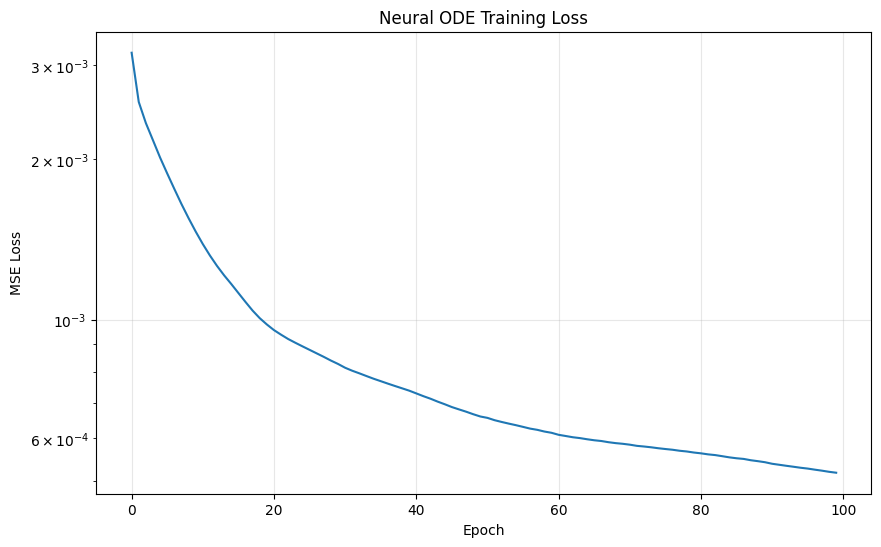

In [32]:
neural_ode_model, state_scaler, action_scaler, dt = train_neural_ode_sysid()


Testing Neural ODE model with 50 predictions...


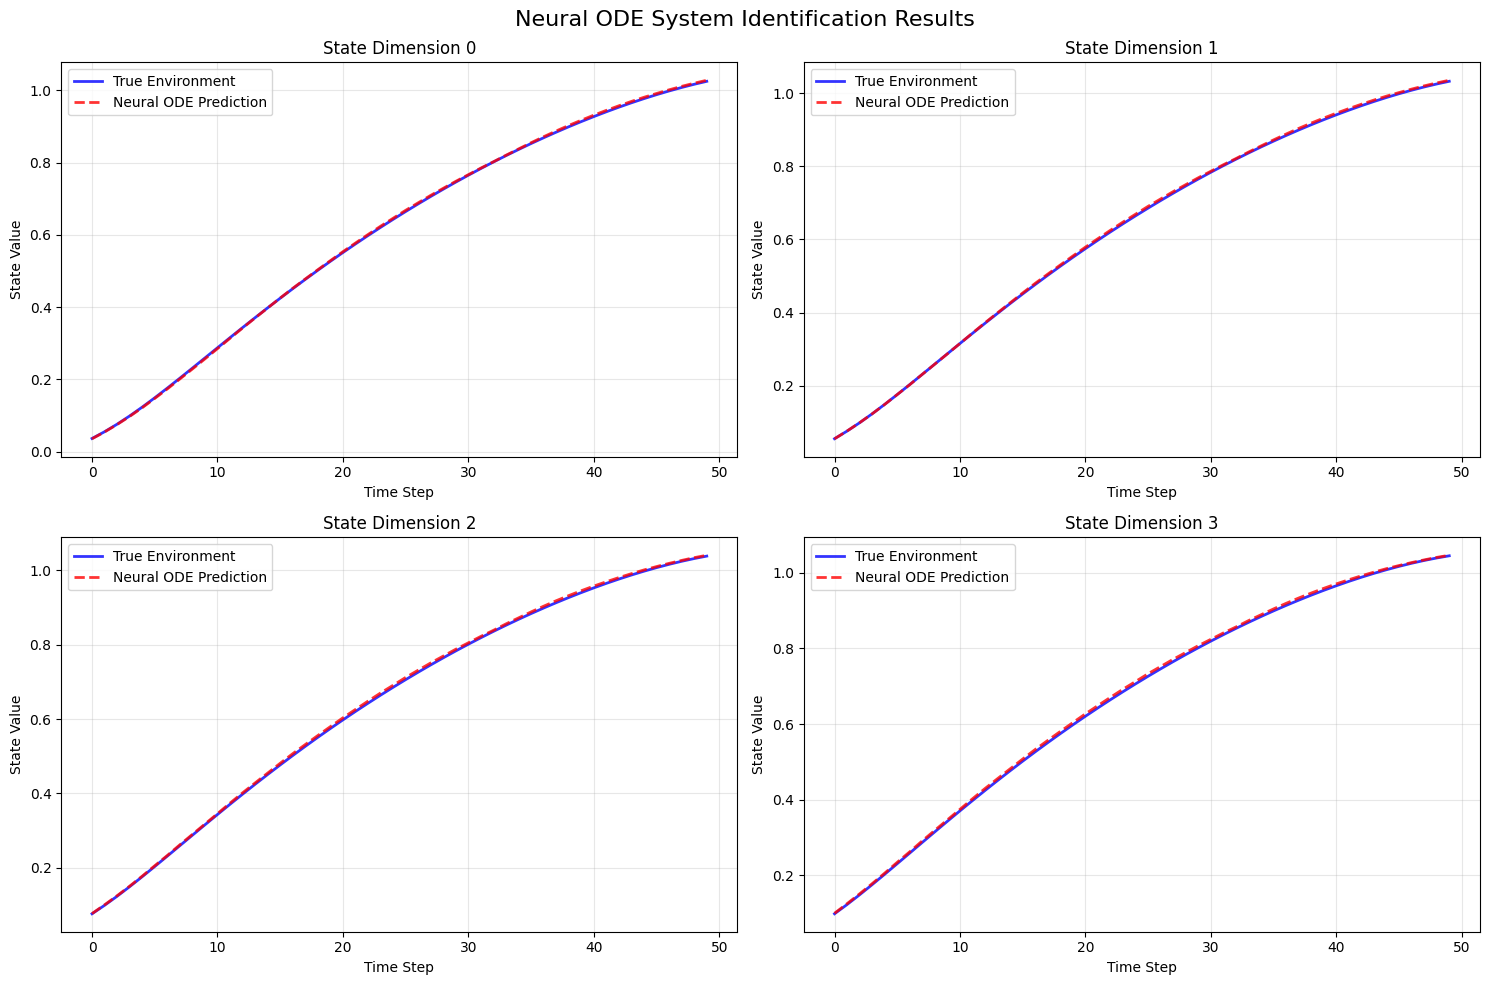


Neural ODE System Identification Results:
  Test samples: 50
  MSE Error: 0.000020
  MAE Error: 0.003273
  Relative Error: 0.0051
✅ Excellent Neural ODE performance!


In [33]:
test_neural_ode_model(neural_ode_model, state_scaler, action_scaler, dt)

## System ID Agent

In [34]:
# SAC-based Active Learning Agent for Neural ODE System ID
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random
import copy

# SAC hyperparameters
SAC_CONFIG = {
    'lr': 3e-4,
    'gamma': 0.99,
    'tau': 0.005,
    'alpha': 0.2,
    'target_update_interval': 1,
    'replay_buffer_size': 100000,
    'batch_size': 256,
    'hidden_dim': 256
}

class ReplayBuffer:
    """Experience replay buffer for SAC"""
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = map(np.stack, zip(*batch))
        return state, action, reward, next_state, done
    
    def __len__(self):
        return len(self.buffer)

class SACActorNetwork(nn.Module):
    """SAC Actor Network (Policy)"""
    def __init__(self, state_dim, action_dim, hidden_dim=256, max_action=1.0):
        super(SACActorNetwork, self).__init__()
        
        self.max_action = max_action
        self.log_std_min = -20
        self.log_std_max = 2
        
        # Shared layers
        self.fc1 = nn.Linear(state_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        
        # Mean and log_std heads
        self.mean_head = nn.Linear(hidden_dim, action_dim)
        self.log_std_head = nn.Linear(hidden_dim, action_dim)
        
    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        
        mean = self.mean_head(x)
        log_std = self.log_std_head(x)
        log_std = torch.clamp(log_std, self.log_std_min, self.log_std_max)
        
        return mean, log_std
    
    def sample(self, state):
        mean, log_std = self.forward(state)
        std = log_std.exp()
        
        # Reparameterization trick
        normal = torch.distributions.Normal(mean, std)
        x_t = normal.rsample()  # rsample for reparameterization trick
        action = torch.tanh(x_t) * self.max_action
        
        # Calculate log probability
        log_prob = normal.log_prob(x_t)
        # Enforcing action bounds (tanh)
        log_prob -= torch.log(self.max_action * (1 - action.pow(2)) + 1e-6)
        log_prob = log_prob.sum(1, keepdim=True)
        
        return action, log_prob
    
    def get_action(self, state, deterministic=False):
        """Get action for inference"""
        mean, log_std = self.forward(state)
        
        if deterministic:
            action = torch.tanh(mean) * self.max_action
            return action
        else:
            std = log_std.exp()
            normal = torch.distributions.Normal(mean, std)
            x_t = normal.sample()
            action = torch.tanh(x_t) * self.max_action
            return action

class SACCriticNetwork(nn.Module):
    """SAC Critic Network (Q-function)"""
    def __init__(self, state_dim, action_dim, hidden_dim=256):
        super(SACCriticNetwork, self).__init__()
        
        # Q1 network
        self.q1_fc1 = nn.Linear(state_dim + action_dim, hidden_dim)
        self.q1_fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.q1_fc3 = nn.Linear(hidden_dim, 1)
        
        # Q2 network
        self.q2_fc1 = nn.Linear(state_dim + action_dim, hidden_dim)
        self.q2_fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.q2_fc3 = nn.Linear(hidden_dim, 1)
    
    def forward(self, state, action):
        sa = torch.cat([state, action], dim=1)
        
        # Q1
        q1 = F.relu(self.q1_fc1(sa))
        q1 = F.relu(self.q1_fc2(q1))
        q1 = self.q1_fc3(q1)
        
        # Q2
        q2 = F.relu(self.q2_fc1(sa))
        q2 = F.relu(self.q2_fc2(q2))
        q2 = self.q2_fc3(q2)
        
        return q1, q2

class SACActiveAgent:
    """SAC Agent for Active Data Collection"""
    def __init__(self, state_dim, action_dim, config=SAC_CONFIG):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = config['gamma']
        self.tau = config['tau']
        self.alpha = config['alpha']
        self.target_update_interval = config['target_update_interval']
        self.device = device
        
        # Networks
        self.actor = SACActorNetwork(state_dim, action_dim, config['hidden_dim']).to(device)
        self.critic = SACCriticNetwork(state_dim, action_dim, config['hidden_dim']).to(device)
        self.target_critic = SACCriticNetwork(state_dim, action_dim, config['hidden_dim']).to(device)
        
        # Copy parameters to target network
        self.target_critic.load_state_dict(self.critic.state_dict())
        
        # Optimizers
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=config['lr'])
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=config['lr'])
        
        # Automatic entropy tuning
        self.target_entropy = -torch.prod(torch.Tensor([action_dim])).item()
        self.log_alpha = torch.zeros(1, requires_grad=True, device=device)
        self.alpha_optimizer = optim.Adam([self.log_alpha], lr=config['lr'])
        
        # Replay buffer
        self.replay_buffer = ReplayBuffer(config['replay_buffer_size'])
        self.batch_size = config['batch_size']
        
        # Training counters
        self.total_updates = 0
        
    def get_action(self, state, deterministic=False):
        """Get action from the actor network"""
        state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        with torch.no_grad():
            action = self.actor.get_action(state, deterministic)
        return action.cpu().numpy().flatten()
    
    def store_experience(self, state, action, reward, next_state, done):
        """Store experience in replay buffer"""
        self.replay_buffer.push(state, action, reward, next_state, done)
    
    def update(self):
        """Update SAC networks"""
        if len(self.replay_buffer) < self.batch_size:
            return {}
        
        # Sample batch
        state, action, reward, next_state, done = self.replay_buffer.sample(self.batch_size)
        
        state = torch.FloatTensor(state).to(self.device)
        action = torch.FloatTensor(action).to(self.device)
        reward = torch.FloatTensor(reward).unsqueeze(1).to(self.device)
        next_state = torch.FloatTensor(next_state).to(self.device)
        done = torch.FloatTensor(done).unsqueeze(1).to(self.device)
        
        # Update Critic
        with torch.no_grad():
            next_action, next_log_prob = self.actor.sample(next_state)
            q1_next, q2_next = self.target_critic(next_state, next_action)
            q_next = torch.min(q1_next, q2_next) - self.alpha * next_log_prob
            target_q = reward + (1 - done) * self.gamma * q_next
        
        q1, q2 = self.critic(state, action)
        critic_loss = F.mse_loss(q1, target_q) + F.mse_loss(q2, target_q)
        
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        
        # Update Actor
        action_new, log_prob = self.actor.sample(state)
        q1_new, q2_new = self.critic(state, action_new)
        q_new = torch.min(q1_new, q2_new)
        
        actor_loss = (self.alpha * log_prob - q_new).mean()
        
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        # Update temperature (alpha)
        alpha_loss = -(self.log_alpha * (log_prob + self.target_entropy).detach()).mean()
        
        self.alpha_optimizer.zero_grad()
        alpha_loss.backward()
        self.alpha_optimizer.step()
        
        self.alpha = self.log_alpha.exp()
        
        # Update target networks
        if self.total_updates % self.target_update_interval == 0:
            self.soft_update(self.target_critic, self.critic)
        
        self.total_updates += 1
        
        return {
            'critic_loss': critic_loss.item(),
            'actor_loss': actor_loss.item(),
            'alpha_loss': alpha_loss.item(),
            'alpha': self.alpha.item()
        }
    
    def soft_update(self, target, source):
        """Soft update target network"""
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(target_param.data * (1.0 - self.tau) + param.data * self.tau)
    
    def save(self, filepath):
        """Save agent"""
        torch.save({
            'actor': self.actor.state_dict(),
            'critic': self.critic.state_dict(),
            'target_critic': self.target_critic.state_dict(),
            'actor_optimizer': self.actor_optimizer.state_dict(),
            'critic_optimizer': self.critic_optimizer.state_dict(),
            'alpha_optimizer': self.alpha_optimizer.state_dict(),
            'log_alpha': self.log_alpha
        }, filepath)
    
    def load(self, filepath):
        """Load agent"""
        checkpoint = torch.load(filepath)
        self.actor.load_state_dict(checkpoint['actor'])
        self.critic.load_state_dict(checkpoint['critic'])
        self.target_critic.load_state_dict(checkpoint['target_critic'])
        self.actor_optimizer.load_state_dict(checkpoint['actor_optimizer'])
        self.critic_optimizer.load_state_dict(checkpoint['critic_optimizer'])
        self.alpha_optimizer.load_state_dict(checkpoint['alpha_optimizer'])
        self.log_alpha = checkpoint['log_alpha']
        self.alpha = self.log_alpha.exp()


In [35]:
class ActiveLearningEnvironment:
    """Environment wrapper for active learning"""
    def __init__(self, base_env_id, neural_ode_model, state_scaler, action_scaler, dt):
        self.env_id = base_env_id
        self.neural_ode_model = neural_ode_model
        self.state_scaler = state_scaler
        self.action_scaler = action_scaler
        self.dt = dt
        self.real_env = None
        self.current_state = None
        self.episode_data = []
        self.total_interactions = 0
        
    def reset(self):
        """Reset the environment"""
        if self.real_env is not None:
            self.real_env.close()
        
        self.real_env = gym.make(self.env_id)
        reset_result = self.real_env.reset()
        self.current_state = reset_result[0] if isinstance(reset_result, tuple) else reset_result
        self.episode_data = []
        return self.current_state.copy()
    
    def step(self, action):
        """Take a step and compute reward based on prediction error"""
        if self.real_env is None or self.current_state is None:
            raise RuntimeError("Environment not reset")
        
        # Ensure action is in correct format
        if isinstance(action, torch.Tensor):
            action = action.detach().cpu().numpy()
        if action.ndim > 1:
            action = action.flatten()
        
        # Get Neural ODE prediction
        predicted_next_state = self._get_neural_ode_prediction(self.current_state, action)
        
        # Get true next state from real environment
        try:
            step_result = self.real_env.step(action)
            if len(step_result) == 4:
                true_next_state, env_reward, done, info = step_result
            else:
                true_next_state, env_reward, terminated, truncated, info = step_result
                done = terminated or truncated
            
            self.total_interactions += 1
            
        except Exception as e:
            print(f"Environment step error: {e}")
            # Return penalty for invalid action
            return self.current_state, -10.0, True, {}
        
        # Calculate prediction error (this is what we want to maximize)
        prediction_error = np.mean(np.abs(predicted_next_state - true_next_state))
        
        # Calculate reward components
        curiosity_reward = prediction_error * 10.0  # Reward for finding prediction errors
        efficiency_penalty = -0.1  # Small penalty for each interaction to encourage efficiency
        
        # Total reward
        reward = curiosity_reward + efficiency_penalty
        
        # Store data for potential Neural ODE retraining
        self.episode_data.append({
            'state': self.current_state.copy(),
            'action': action.copy(),
            'next_state': true_next_state.copy(),
            'prediction_error': prediction_error
        })
        
        # Update current state
        self.current_state = true_next_state
        
        return true_next_state, reward, done, {
            'prediction_error': prediction_error,
            'curiosity_reward': curiosity_reward,
            'total_interactions': self.total_interactions
        }
    
    def _get_neural_ode_prediction(self, state, action):
        """Get prediction from Neural ODE model"""
        try:
            # Normalize inputs
            state_norm = self.state_scaler.transform(state.reshape(1, -1))
            action_norm = self.action_scaler.transform(action.reshape(1, -1))
            
            # Convert to tensors
            state_tensor = torch.FloatTensor(state_norm).to(device)
            action_tensor = torch.FloatTensor(action_norm).to(device)
            
            # Get prediction
            with torch.no_grad():
                pred_next_norm = self.neural_ode_model(state_tensor, action_tensor, self.dt)
                pred_next_state = self.state_scaler.inverse_transform(pred_next_norm.cpu().numpy())[0]
            
            return pred_next_state
            
        except Exception as e:
            print(f"Neural ODE prediction error: {e}")
            return state  # Return current state as fallback
    
    def get_episode_data(self):
        """Get collected episode data"""
        return self.episode_data.copy()
    
    def close(self):
        """Close the environment"""
        if self.real_env is not None:
            self.real_env.close()

In [36]:
def retrain_neural_ode(neural_ode_model, new_states, new_actions, new_next_states,
                      state_scaler, action_scaler, dt, epochs=20):
    """Retrain Neural ODE with new collected data"""
    if len(new_states) < 10:
        return float('inf')
    
    # Convert to arrays
    states = np.array(new_states)
    actions = np.array(new_actions)
    next_states = np.array(new_next_states)
    
    # Normalize data
    states_norm = state_scaler.transform(states)
    actions_norm = action_scaler.transform(actions)
    next_states_norm = state_scaler.transform(next_states)
    
    # Convert to tensors
    states_tensor = torch.FloatTensor(states_norm).to(device)
    actions_tensor = torch.FloatTensor(actions_norm).to(device)
    next_states_tensor = torch.FloatTensor(next_states_norm).to(device)
    
    # Setup training
    dataset = TensorDataset(states_tensor, actions_tensor, next_states_tensor)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    optimizer = optim.Adam(neural_ode_model.parameters(), lr=5e-4)
    criterion = nn.MSELoss()
    
    # Training loop
    for epoch in range(epochs):
        total_loss = 0
        for batch_states, batch_actions, batch_next_states in dataloader:
            optimizer.zero_grad()
            
            pred_next_states = neural_ode_model(batch_states, batch_actions, dt)
            loss = criterion(pred_next_states, batch_next_states)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(neural_ode_model.parameters(), max_norm=1.0)
            optimizer.step()
            
            total_loss += loss.item()
    
    # Evaluate accuracy
    with torch.no_grad():
        pred_states = neural_ode_model(states_tensor, actions_tensor, dt)
        pred_denorm = state_scaler.inverse_transform(pred_states.cpu().numpy())
        
        mae_error = np.mean(np.abs(next_states - pred_denorm))
        relative_error = mae_error / (np.mean(np.abs(next_states)) + 1e-8)
    
    return relative_error

In [37]:
def plot_sac_training_progress(episode_rewards, prediction_errors, 
                              neural_ode_accuracies, training_metrics):
    """Plot SAC training progress"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Episode rewards
    axes[0, 0].plot(episode_rewards)
    axes[0, 0].set_title('SAC Agent Episode Rewards')
    axes[0, 0].set_xlabel('Episode')
    axes[0, 0].set_ylabel('Reward')
    axes[0, 0].grid(True)
    
    # Prediction errors found by agent
    axes[0, 1].plot(prediction_errors)
    axes[0, 1].set_title('Prediction Errors Found')
    axes[0, 1].set_xlabel('Episode')
    axes[0, 1].set_ylabel('Avg Prediction Error')
    axes[0, 1].grid(True)
    
    # Neural ODE accuracy over time
    if neural_ode_accuracies:
        retraining_episodes = list(range(0, len(neural_ode_accuracies) * 15, 15))
        axes[0, 2].plot(retraining_episodes, neural_ode_accuracies, 'ro-')
        axes[0, 2].set_title('Neural ODE Accuracy')
        axes[0, 2].set_xlabel('Episode')
        axes[0, 2].set_ylabel('Relative Error')
        axes[0, 2].set_yscale('log')
        axes[0, 2].grid(True)
        axes[0, 2].axhline(y=0.001, color='g', linestyle='--', label='Target Error')
        axes[0, 2].legend()
    
    # SAC specific metrics
    if training_metrics['critic_loss']:
        axes[1, 0].plot(training_metrics['critic_loss'])
        axes[1, 0].set_title('Critic Loss')
        axes[1, 0].set_xlabel('Update Step')
        axes[1, 0].set_ylabel('Loss')
        axes[1, 0].grid(True)
    
    if training_metrics['actor_loss']:
        axes[1, 1].plot(training_metrics['actor_loss'])
        axes[1, 1].set_title('Actor Loss')
        axes[1, 1].set_xlabel('Update Step')
        axes[1, 1].set_ylabel('Loss')
        axes[1, 1].grid(True)
    
    if training_metrics['alpha']:
        axes[1, 2].plot(training_metrics['alpha'])
        axes[1, 2].set_title('Temperature (α)')
        axes[1, 2].set_xlabel('Update Step')
        axes[1, 2].set_ylabel('Alpha Value')
        axes[1, 2].grid(True)
    
    plt.tight_layout()
    plt.show()

In [38]:
def train_sac_active_agent(neural_ode_model, state_scaler, action_scaler, dt,
                          target_error=0.001, max_episodes=300):
    """Train SAC agent for active data collection"""
    print("Training SAC Active Data Collection Agent...")
    
    # Get environment dimensions
    temp_env = gym.make('oscillator-v0')
    temp_state = temp_env.reset()
    if isinstance(temp_state, tuple):
        temp_state = temp_state[0]
    
    state_dim = temp_state.shape[0]
    action_dim = temp_env.action_space.shape[0]
    temp_env.close()
    
    print(f"State dim: {state_dim}, Action dim: {action_dim}")
    
    # Initialize SAC agent
    agent = SACActiveAgent(state_dim, action_dim)
    
    # Initialize active learning environment
    active_env = ActiveLearningEnvironment('oscillator-v0', neural_ode_model,
                                         state_scaler, action_scaler, dt)
    
    # Training data storage
    collected_states = []
    collected_actions = []
    collected_next_states = []
    
    # Training metrics
    episode_rewards = []
    prediction_errors = []
    neural_ode_accuracies = []
    training_metrics = {'critic_loss': [], 'actor_loss': [], 'alpha': []}
    
    print("Starting SAC active learning...")
    
    for episode in range(max_episodes):
        state = active_env.reset()
        episode_reward = 0
        episode_errors = []
        steps = 0
        
        # Run episode
        for step in range(200):  # Max steps per episode
            # Get action from SAC agent
            if episode < 10:  # Random exploration for first 10 episodes
                action = np.random.uniform(-1, 1, action_dim)
            else:
                action = agent.get_action(state, deterministic=False)
            
            # Take step in environment
            next_state, reward, done, info = active_env.step(action)
            
            # Store experience in replay buffer
            agent.store_experience(state, action, reward, next_state, done)
            
            episode_reward += reward
            episode_errors.append(info['prediction_error'])
            state = next_state
            steps += 1
            
            # Update SAC agent
            if len(agent.replay_buffer) > agent.batch_size and episode > 10:
                update_info = agent.update()
                if update_info:
                    for key, value in update_info.items():
                        if key in training_metrics:
                            training_metrics[key].append(value)
            
            if done:
                break
        
        # Collect new data for Neural ODE retraining
        episode_data = active_env.get_episode_data()
        for data_point in episode_data:
            collected_states.append(data_point['state'])
            collected_actions.append(data_point['action'])
            collected_next_states.append(data_point['next_state'])
        
        # Store metrics
        episode_rewards.append(episode_reward)
        avg_error = np.mean(episode_errors) if episode_errors else 0
        prediction_errors.append(avg_error)
        
        # Retrain Neural ODE every 15 episodes with new data
        if episode % 15 == 0 and len(collected_states) > 100:
            print(f"\n Retraining Neural ODE with {len(collected_states)} new samples...")
            neural_ode_accuracy = retrain_neural_ode(
                neural_ode_model, collected_states, collected_actions,
                collected_next_states, state_scaler, action_scaler, dt, epochs=30
            )
            neural_ode_accuracies.append(neural_ode_accuracy)
            
            print(f"Episode {episode}: Reward={episode_reward:.2f}, "
                  f"Steps={steps}, Avg_Error={avg_error:.4f}, "
                  f"Neural_ODE_Error={neural_ode_accuracy:.6f}")
            
            # Check if target accuracy reached
            if neural_ode_accuracy < target_error:
                print(f"\n Target accuracy reached! Neural ODE error: {neural_ode_accuracy:.6f}")
                break
                
            # Clear collected data after retraining to avoid memory issues
            if len(collected_states) > 2000:
                collected_states = collected_states[-1000:]
                collected_actions = collected_actions[-1000:]
                collected_next_states = collected_next_states[-1000:]
        else:
            print(f"Episode {episode}: Reward={episode_reward:.2f}, "
                  f"Steps={steps}, Avg_Error={avg_error:.4f}")
    
    active_env.close()
    
    # Save trained SAC agent
    agent.save('sac_active_data_collection_agent.pth')
    print("\n SAC agent saved as 'sac_active_data_collection_agent.pth'")
    
    # Plot training progress
    plot_sac_training_progress(episode_rewards, prediction_errors, 
                              neural_ode_accuracies, training_metrics)
    
    return agent, collected_states, collected_actions, collected_next_states

Starting SAC-based Active Learning for Neural ODE System ID...
Training SAC Active Data Collection Agent...
State dim: 250, Action dim: 1
Starting SAC active learning...

 Retraining Neural ODE with 200 new samples...
Episode 0: Reward=-8.09, Steps=200, Avg_Error=0.0060, Neural_ODE_Error=0.005950
Episode 1: Reward=-9.84, Steps=200, Avg_Error=0.0051
Episode 2: Reward=-9.15, Steps=200, Avg_Error=0.0054
Episode 3: Reward=-8.89, Steps=200, Avg_Error=0.0056
Episode 4: Reward=-9.91, Steps=200, Avg_Error=0.0050
Episode 5: Reward=-9.29, Steps=200, Avg_Error=0.0054
Episode 6: Reward=-10.01, Steps=200, Avg_Error=0.0050
Episode 7: Reward=-10.92, Steps=200, Avg_Error=0.0045
Episode 8: Reward=-10.12, Steps=200, Avg_Error=0.0049
Episode 9: Reward=-8.60, Steps=200, Avg_Error=0.0057
Episode 10: Reward=-9.45, Steps=200, Avg_Error=0.0053
Episode 11: Reward=-10.32, Steps=200, Avg_Error=0.0048
Episode 12: Reward=-9.14, Steps=200, Avg_Error=0.0054
Episode 13: Reward=-9.59, Steps=200, Avg_Error=0.0052
Episo

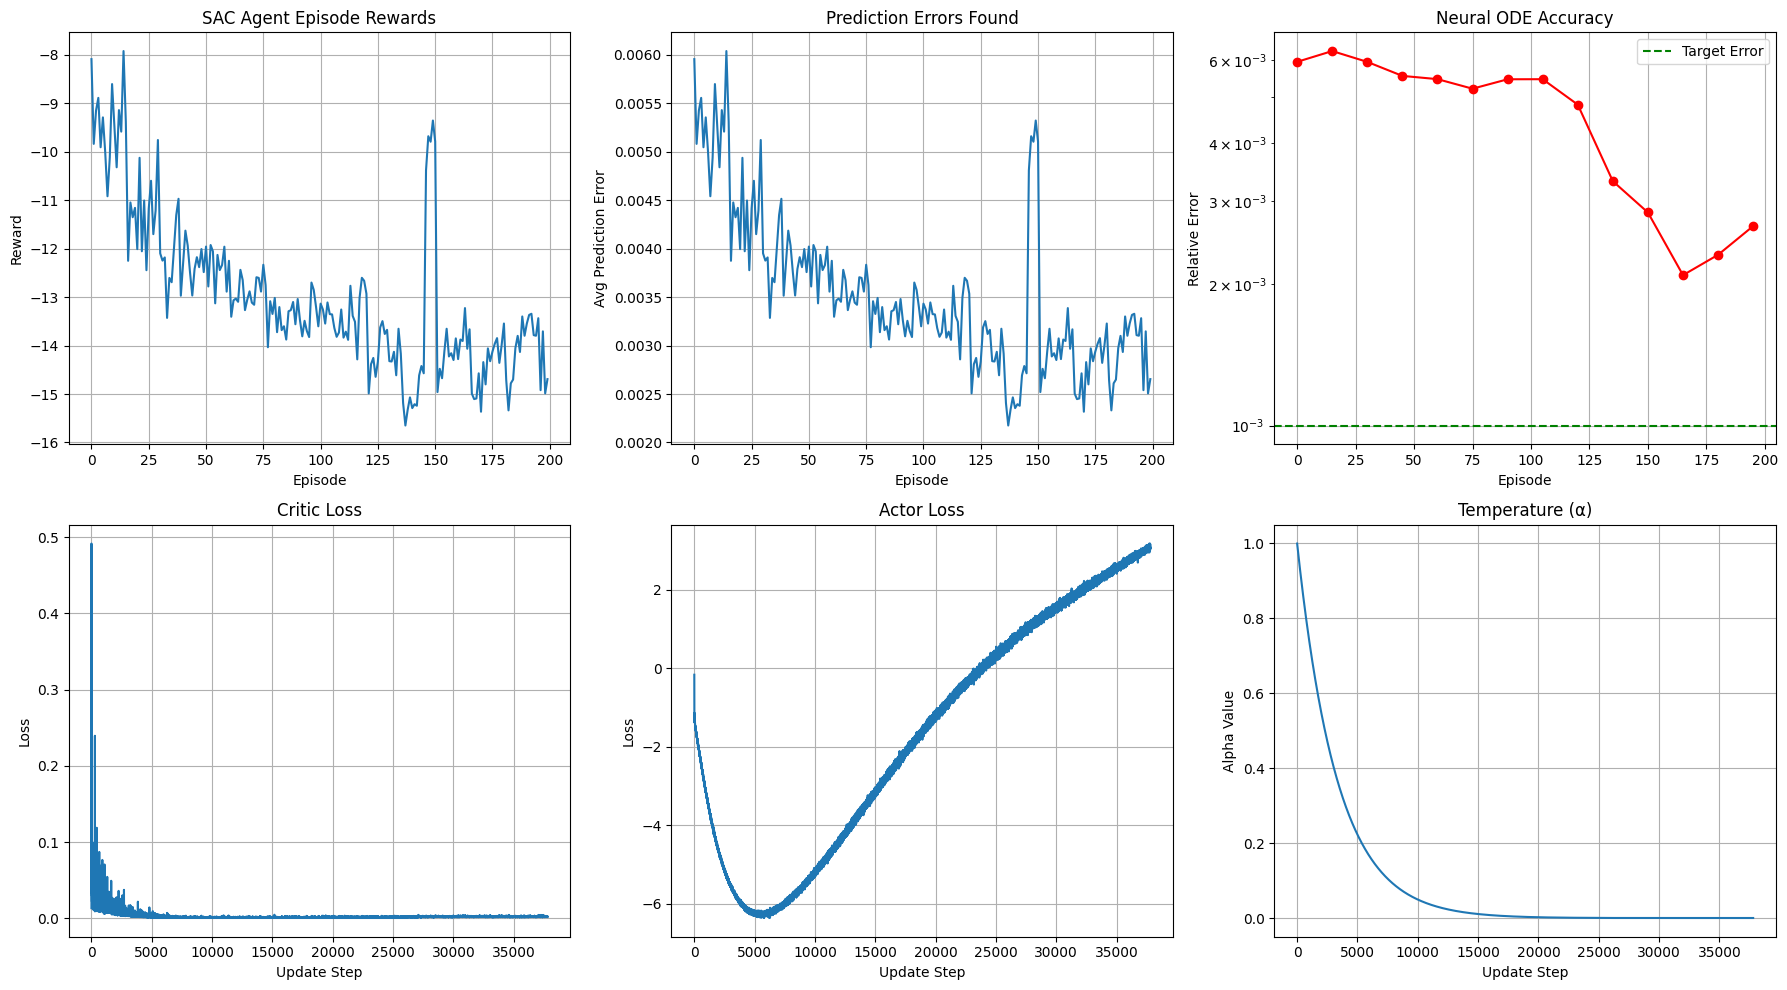


 SAC active learning completed!
Total data points collected: 1800
SAC agent saved and ready for future use!


In [70]:
# Run the SAC active learning system
print("Starting SAC-based Active Learning for Neural ODE System ID...")
sac_agent, final_states, final_actions, final_next_states = train_sac_active_agent(
    neural_ode_model, state_scaler, action_scaler, dt,
    target_error=0.001, max_episodes=200
)

print(f"\n SAC active learning completed!")
print(f"Total data points collected: {len(final_states)}")
print(f"SAC agent saved and ready for future use!")

# Enhanced SAC Training with Improved Reward Function

Now we'll train the SAC agent using an enhanced reward function that provides better exploration dynamics and prevents monotonic reward increases. The new reward function includes:

1. **Adaptive Curiosity**: Reduces curiosity weight as the model improves
2. **Information Gain**: Rewards high-variance prediction errors 
3. **State Diversity**: Encourages exploring different state regions
4. **Action Smoothness**: Penalizes erratic actions
5. **Exploration Efficiency**: Higher rewards early in episodes
6. **Progressive Difficulty**: Increases exploration challenge over time

In [39]:
class EnhancedRewardCalculator:
    """Enhanced reward function for Neural ODE system identification exploration"""
    
    def __init__(self):
        self.prev_action = None
        self.episode_count = 0
    
    def compute_enhanced_reward(self, state, action, next_state, prediction_error, episode_step, total_episodes):
        """
        Enhanced reward function for Neural ODE system identification exploration
        
        Args:
            state: Current state tensor
            action: Action taken tensor
            next_state: Resulting next state tensor
            prediction_error: Neural ODE prediction error (scalar or tensor)
            episode_step: Current step in episode
            total_episodes: Total episodes completed so far
        """
        
        # Convert prediction_error to scalar if it's a tensor
        if torch.is_tensor(prediction_error):
            pred_error_scalar = prediction_error.item() if prediction_error.numel() == 1 else torch.mean(prediction_error).item()
        else:
            pred_error_scalar = float(prediction_error)
        
        # 1. Adaptive curiosity reward - decreases as model improves
        base_curiosity = pred_error_scalar * 15.0
        adaptation_factor = max(0.1, 1.0 - (total_episodes / 500))  # Decay over episodes
        curiosity_reward = base_curiosity * adaptation_factor
        
        # 2. Information gain bonus - reward for high uncertainty regions
        if torch.is_tensor(prediction_error) and prediction_error.numel() > 1:
            prediction_variance = torch.var(prediction_error).item()
            info_gain_bonus = prediction_variance * 5.0
        else:
            info_gain_bonus = pred_error_scalar * 2.0  # Fallback for scalar errors
        
        # 3. State diversity reward - encourage exploring different state regions
        if torch.is_tensor(state):
            state_norm = torch.norm(state).item()
        else:
            state_norm = np.linalg.norm(state)
        diversity_reward = np.tanh(state_norm * 0.5) * 2.0  # Bounded reward for state magnitude
        
        # 4. Action smoothness penalty - discourage erratic actions
        if self.prev_action is not None:
            if torch.is_tensor(action) and torch.is_tensor(self.prev_action):
                action_diff = torch.norm(action - self.prev_action).item()
            else:
                action_diff = np.linalg.norm(np.array(action) - np.array(self.prev_action))
            smoothness_penalty = -action_diff * 0.5
        else:
            smoothness_penalty = 0
        
        # Store current action for next iteration
        if torch.is_tensor(action):
            self.prev_action = action.clone().detach()
        else:
            self.prev_action = np.array(action).copy()
        
        # 5. Exploration efficiency bonus - higher early in episode
        exploration_bonus = max(0, (1.0 - episode_step / 200) * pred_error_scalar * 3.0)
        
        # 6. Model improvement reward - bonus for finding areas that improve overall model
        if pred_error_scalar > 0.1:  # Significant error threshold
            improvement_reward = 8.0
        elif pred_error_scalar > 0.05:  # Moderate error
            improvement_reward = 4.0
        else:  # Small error
            improvement_reward = 1.0
        
        # 7. Progressive difficulty - harder exploration as model improves
        difficulty_multiplier = 1.0 + (total_episodes / 1000)  # Increase over time
        
        # Combine all components
        total_reward = (
            curiosity_reward +
            info_gain_bonus +
            diversity_reward +
            smoothness_penalty +
            exploration_bonus +
            improvement_reward
        ) * difficulty_multiplier
        
        # Add small base reward to prevent purely negative rewards
        base_reward = 0.5
        
        return total_reward + base_reward
    
    def reset_episode(self):
        """Reset episode-specific variables"""
        self.prev_action = None
        self.episode_count += 1

# Initialize the enhanced reward calculator
enhanced_reward_calc = EnhancedRewardCalculator()
print("Enhanced reward calculator initialized!")

Enhanced reward calculator initialized!


In [48]:
def train_sac_enhanced_reward_corrected(neural_ode_model, state_scaler, action_scaler, dt,
                                       target_error=0.001, max_episodes=300):
    """
    Corrected SAC training function with enhanced reward that properly uses NeuralODESystemID
    and handles both old and new Gym API step return values
    """
    print("Starting Enhanced SAC Training with Corrected Implementation...")
    print("="*60)
    
    # Initialize enhanced reward calculator
    reward_calc = EnhancedRewardCalculator()
    
    # Create environment
    env = gym.make('oscillator-v0')
    
    # Get environment dimensions
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    action_low = env.action_space.low
    action_high = env.action_space.high
    
    # Initialize SAC agent
    agent = SACActiveAgent(state_dim, action_dim)
    
    # Training metrics
    episode_rewards = []
    prediction_errors = []
    neural_ode_accuracies = []
    
    # Data collection for Neural ODE retraining
    collected_states = []
    collected_actions = []
    collected_next_states = []
    
    print(f"Starting Enhanced SAC Training for Neural ODE System ID...")
    print(f"Target error: {target_error}, Max episodes: {max_episodes}")
    
    for episode in range(max_episodes):
        # Reset environment
        reset_result = env.reset()
        state = reset_result[0] if isinstance(reset_result, tuple) else reset_result
        
        episode_reward = 0
        episode_errors = []
        
        for step in range(200):  # Max steps per episode
            # Normalize state for SAC agent
            state_normalized = state_scaler.transform(state.reshape(1, -1))[0]
            
            # SAC agent selects action
            action = agent.get_action(state_normalized, deterministic=False)
            
            # Denormalize action for environment
            action_denorm = action_scaler.inverse_transform(action.reshape(1, -1))[0]
            action_clipped = np.clip(action_denorm, action_low, action_high)
            
            # Take step in environment - handle both old and new Gym API
            step_result = env.step(action_clipped)
            
            if len(step_result) == 4:
                # Old Gym API: (obs, reward, done, info)
                next_state, env_reward, done, info = step_result
                truncated = False
            else:
                # New Gym API: (obs, reward, terminated, truncated, info)
                next_state, env_reward, done, truncated, info = step_result
            
            # Get Neural ODE prediction error using correct method signature
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state_normalized).unsqueeze(0).to(device)
                action_tensor = torch.FloatTensor(action).unsqueeze(0).to(device)
                
                # Use the correct forward method: neural_ode_model(x0, action, dt)
                predicted_next_state = neural_ode_model(state_tensor, action_tensor, dt)
                next_state_normalized = state_scaler.transform(next_state.reshape(1, -1))[0]
                next_state_tensor = torch.FloatTensor(next_state_normalized).unsqueeze(0).to(device)
                
                prediction_error = torch.mean((predicted_next_state - next_state_tensor) ** 2).item()
            
            # Compute enhanced reward
            enhanced_reward = reward_calc.compute_enhanced_reward(
                state_normalized, action, next_state_normalized, 
                prediction_error, step, episode
            )
            
            # Store experience in SAC replay buffer (correct attribute name)
            agent.store_experience(state_normalized, action, enhanced_reward, next_state_normalized, done or truncated)
            
            # Collect data for Neural ODE retraining
            collected_states.append(state_normalized.copy())
            collected_actions.append(action.copy())
            collected_next_states.append(next_state_normalized.copy())
            
            # Update SAC agent
            if len(agent.replay_buffer) > agent.batch_size:
                metrics = agent.update()
            
            # Track metrics
            episode_reward += enhanced_reward
            episode_errors.append(prediction_error)
            
            # Update state
            state = next_state
            
            if done or truncated:
                break
        
        # Episode summary
        avg_error = np.mean(episode_errors) if episode_errors else 0
        episode_rewards.append(episode_reward)
        prediction_errors.append(avg_error)
        
        # Periodic Neural ODE retraining
        if episode % 15 == 0 and len(collected_states) > 100:
            print(f"\nRetraining Neural ODE with {len(collected_states)} new samples...")
            neural_ode_accuracy = retrain_neural_ode(
                neural_ode_model, collected_states, collected_actions,
                collected_next_states, state_scaler, action_scaler, dt, epochs=30
            )
            neural_ode_accuracies.append(neural_ode_accuracy)
            
            print(f"Episode {episode}: Reward={episode_reward:.2f}, "
                  f"Steps={step+1}, Avg_Error={avg_error:.4f}, "
                  f"Neural_ODE_Error={neural_ode_accuracy:.6f}")
            
            # Check if target accuracy reached
            if neural_ode_accuracy < target_error:
                print(f"\nTarget accuracy reached! Neural ODE error: {neural_ode_accuracy:.6f}")
                break
                
            # Clear collected data after retraining to avoid memory issues
            if len(collected_states) > 2000:
                collected_states = collected_states[-1000:]
                collected_actions = collected_actions[-1000:]
                collected_next_states = collected_next_states[-1000:]
        else:
            print(f"Episode {episode}: Reward={episode_reward:.2f}, "
                  f"Steps={step+1}, Avg_Error={avg_error:.4f}")
    
    env.close()
    
    # Save trained SAC agent
    agent.save('sac_active_data_collection_agent.pth')
    
    # Create training metrics plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Enhanced SAC Training Results (Corrected)', fontsize=16)
    
    # Episode rewards
    axes[0, 0].plot(episode_rewards)
    axes[0, 0].set_title('Episode Rewards')
    axes[0, 0].set_xlabel('Episode')
    axes[0, 0].set_ylabel('Reward')
    axes[0, 0].grid(True)
    
    # Prediction errors
    axes[0, 1].plot(prediction_errors)
    axes[0, 1].set_title('Prediction Errors')
    axes[0, 1].set_xlabel('Episode')
    axes[0, 1].set_ylabel('MSE Error')
    axes[0, 1].grid(True)
    
    # Neural ODE accuracies
    if neural_ode_accuracies:
        episodes_with_retraining = [i * 15 for i in range(len(neural_ode_accuracies))]
        axes[1, 0].plot(episodes_with_retraining, neural_ode_accuracies, 'ro-')
        axes[1, 0].set_title('Neural ODE Accuracy')
        axes[1, 0].set_xlabel('Episode')
        axes[1, 0].set_ylabel('MSE Error')
        axes[1, 0].grid(True)
        axes[1, 0].axhline(y=target_error, color='g', linestyle='--', label=f'Target: {target_error}')
        axes[1, 0].legend()
    
    # Learning progress
    window_size = 10
    if len(episode_rewards) >= window_size:
        smoothed_rewards = np.convolve(episode_rewards, np.ones(window_size)/window_size, mode='valid')
        axes[1, 1].plot(smoothed_rewards)
        axes[1, 1].set_title(f'Smoothed Rewards (window={window_size})')
        axes[1, 1].set_xlabel('Episode')
        axes[1, 1].set_ylabel('Reward')
        axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return agent, {
        'episode_rewards': episode_rewards,
        'prediction_errors': prediction_errors,
        'neural_ode_accuracies': neural_ode_accuracies
    }

In [ ]:
# Simple function to run your original training call (corrected)
def run_fixed_training():
    """Run the corrected version of your original failing call"""
    print("Running CORRECTED version of your original training call...")
    enhanced_sac_agent, metrics = train_sac_enhanced_reward_corrected(
        neural_ode_model, state_scaler, action_scaler, dt,
        target_error=0.001, max_episodes=300
    )
    return enhanced_sac_agent, metrics

# Quick test function
def run_quick_test():
    """Quick 50-episode test"""
    print("Quick test (50 episodes)...")
    agent, metrics = train_sac_enhanced_reward_corrected(
        neural_ode_model, state_scaler, action_scaler, dt,
        target_error=0.005, max_episodes=50
    )
    return agent, metrics

🔧 Running CORRECTED version of your original training call...
Starting Enhanced SAC Training with Corrected Implementation...
Starting Enhanced SAC Training for Neural ODE System ID...
Target error: 0.001, Max episodes: 300

Retraining Neural ODE with 200 new samples...
Episode 0: Reward=627.27, Steps=200, Avg_Error=0.0002, Neural_ODE_Error=0.009187
Episode 1: Reward=637.32, Steps=200, Avg_Error=0.0014
Episode 2: Reward=637.79, Steps=200, Avg_Error=0.0013
Episode 3: Reward=640.16, Steps=200, Avg_Error=0.0012
Episode 4: Reward=637.39, Steps=200, Avg_Error=0.0010
Episode 5: Reward=643.25, Steps=200, Avg_Error=0.0010
Episode 6: Reward=636.50, Steps=200, Avg_Error=0.0008
Episode 7: Reward=636.99, Steps=200, Avg_Error=0.0012
Episode 8: Reward=643.31, Steps=200, Avg_Error=0.0010
Episode 9: Reward=635.19, Steps=200, Avg_Error=0.0009
Episode 10: Reward=640.89, Steps=200, Avg_Error=0.0011
Episode 11: Reward=646.97, Steps=200, Avg_Error=0.0010
Episode 12: Reward=644.15, Steps=200, Avg_Error=0.00

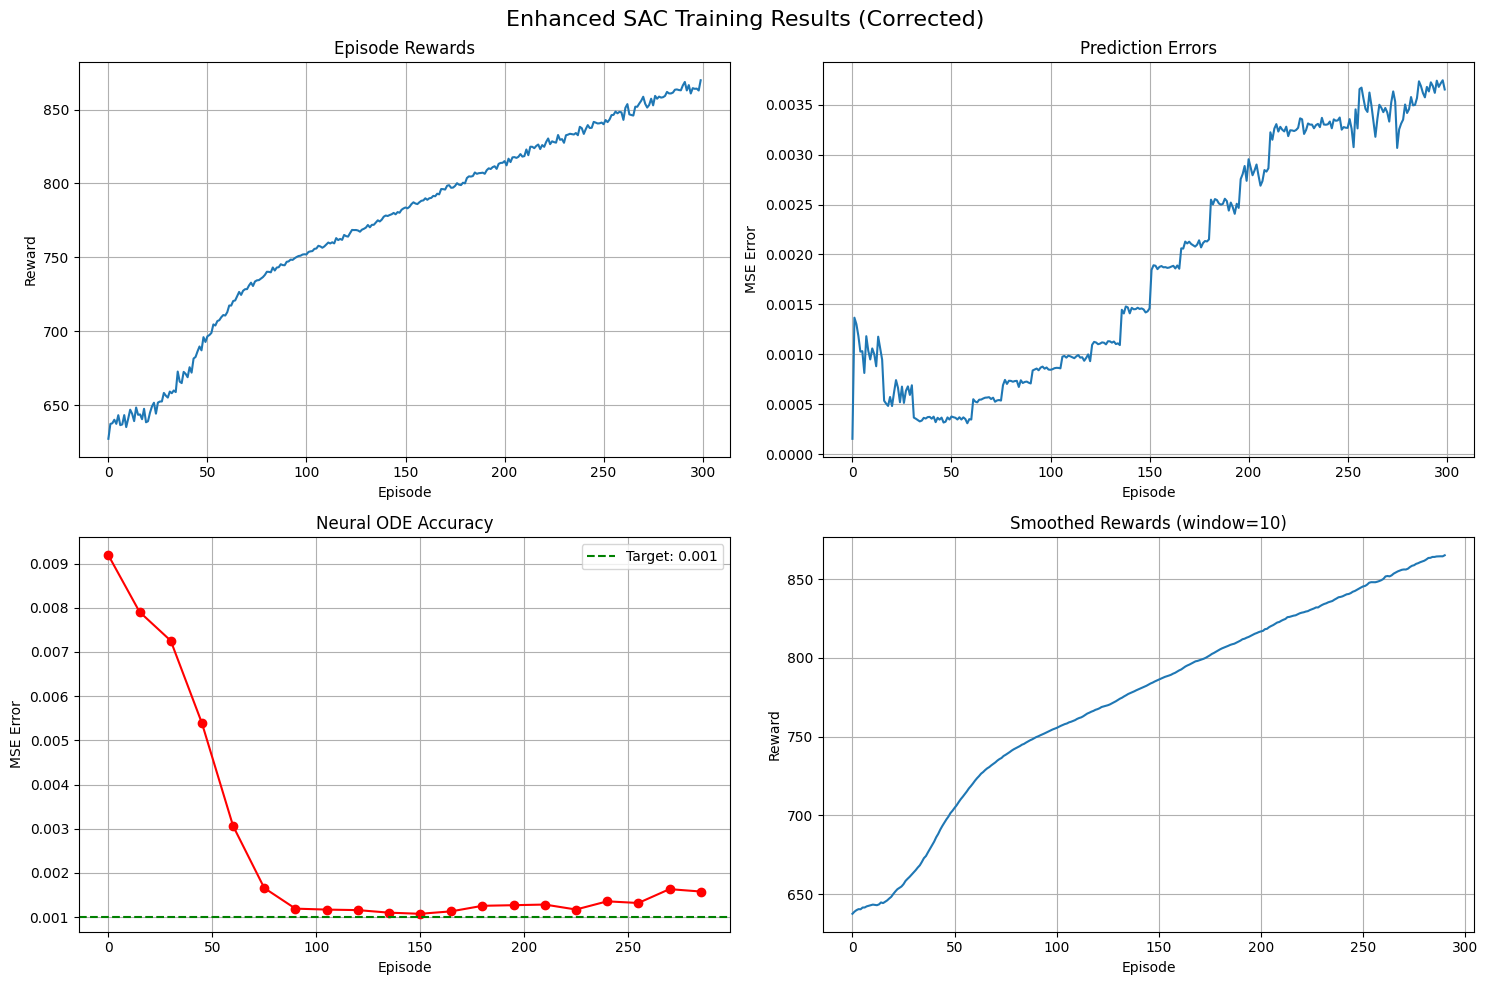

ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
# This replaces your original failing call:
enhanced_sac_agent, metrics = run_fixed_training()